In [1]:
import pandas as pd
import matplotlib 

import os

In [ ]:
experiment_folder = "../../data/evaluations/hallucination-measurement-v1-hyde/"
pkl_files = [f for f in os.listdir(experiment_folder) if f.endswith('.pkl')]
print(pkl_files)

eval_df = pd.read_pickle( f"{experiment_folder}/{pkl_files[1]}" )
eval_df.describe()

['response-v1.pkl', 'results-v0-openai.pkl']


,answer_similarity,faithfulness,answer_correctness
count,5.000000,5.000000,5.000000
mean,0.835563,0.591667,0.478891
std,0.061544,0.145535,0.169895
min,0.736512,0.500000,0.184128
25%,0.814751,0.500000,0.503688
50%,0.866905,0.500000,0.519503
75%,0.878012,0.625000,0.591726
max,0.881632,0.833333,0.595408


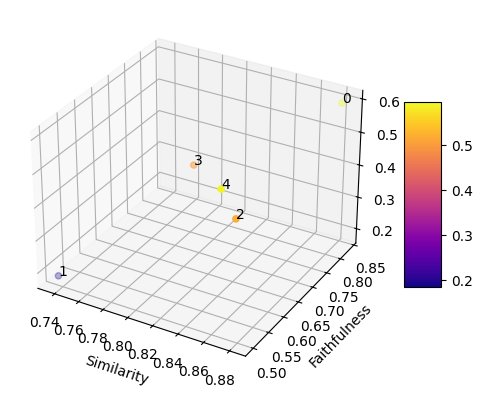

Row 0:
  question: What tv host and writer went to Harvard?
  contexts: ["Other: Civil rights leader W. E. B. Du Bois; philosopher Henry David Thoreau; authors Ralph Waldo Emerson and William S. Burroughs; educators Werner Baer, Harlan Hanson; poets Wallace Stevens, T. S. Eliot and E. E. Cummings; conductor Leonard Bernstein; cellist Yo Yo Ma; pianist and composer Charlie Albright; composer John Alden Carpenter; comedian, television show host and writer Conan O'Brien; actors Tatyana Ali, Nestor Carbonell, Matt Damon, Fred Gwynne, Hill Harper, Rashida Jones, Tommy Lee Jones, Ashley Judd, Jack Lemmon, Natalie Portman, Mira Sorvino, Elisabeth Shue, and Scottie Thompson; film directors Darren Aronofsky, Terrence Malick, Mira Nair, and Whit Stillman; architect Philip Johnson; musicians Rivers Cuomo, Tom Morello, and Gram Parsons; musician, producer and composer Ryan Leslie; serial killer Ted Kaczynski; programmer and activist Richard Stallman; NFL quarterback Ryan Fitzpatrick; NFL center Ma

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a colormap
cmap = plt.get_cmap('plasma')  # You can choose other colormaps like 'viridis', 'inferno', etc.
norm = plt.Normalize(eval_df['answer_correctness'].min(), eval_df['answer_correctness'].max())
colors = cmap(norm(eval_df['answer_correctness']))

# Plot the data
ax.scatter(eval_df['answer_similarity'], eval_df['faithfulness'], eval_df['answer_correctness'], c=colors)

# Label each data point with its index
for i in range(len(eval_df)):
    ax.text(eval_df['answer_similarity'][i], 
            eval_df['faithfulness'][i], 
            eval_df['answer_correctness'][i], 
            '%d' % i)

# Set labels
ax.set_xlabel('Similarity')
ax.set_ylabel('Faithfulness')
ax.set_zlabel('Correctness')

# Add color bar
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array(eval_df['answer_correctness'])
fig.colorbar(mappable, ax=[ax], shrink=0.5, aspect=5)

# Show the plot
plt.show()

# Print DataFrame row by row
for index, row in eval_df.iterrows():
    print(f"Row {index}:")
    for col_name in eval_df.columns:
        print(f"  {col_name}: {row[col_name]}")